In [1]:
import os, sys
import numpy as np
import scipy.misc
import matplotlib.pyplot as plt
import cv2
from skimage.transform import rotate
from PIL import Image
import imagehash
#import argparse
#import shelve
import glob

In [2]:
pdf = os.path.join(os.getcwd(), 'pdf')
CELLPHONE_IMG_PATH = os.path.join(pdf, 'minidataset_cell')
DB_PATH            = os.path.join(pdf, 'mini_dataset_png')

In [3]:
png_paths = glob.glob(os.path.join(DB_PATH, '*.png'))

In [4]:
db = {}

In [ ]:
# ap = argparse.ArgumentParser()
# ap.add_argument("-d", "--dataset", required = True,
#     help = "path to input dataset of images")
# ap.add_argument("-s", "--shelve", required = True,
#     help = "output shelve database")
# args = vars(ap.parse_args())

# # open the shelve database
# db = shelve.open(args["shelve"], writeback = True)

In [8]:
for i in range(len(png_paths)):
    imagePath = png_paths[i]
    image = Image.open(imagePath)
    h = str(imagehash.dhash(image))
    
    filename = imagePath[imagePath.rfind("/") + 1:]
    db[h] = db.get(h, []) + [filename]
#db.close()

In [12]:
print(db.keys())

['007408f0e3c0877f', '03eefdfb2740823f', '040a16e853a851bd', '02fefd1bf02fc0bf', '020468f12743803f', '1a448833e14f9833', '026c09f0614e80ff', '02fc09f027c097ff', '42b40dd02764c83f', '000cf8f1e083871f', '001408f02740803f', '0034e913644a903f', '04593264c890217f', '0efc0bf2a54e913f', '01a6fc1934e2cdbf', '01fe0538f22fc0bf', 'fe01e2070ed03f00', '94e103068c1e3c20', '02fc08f0614e803f', '00dc6f398065dff9', '01c6fc18b46fcb3f', '01fe0738f02fc0ff', '000018f063c28107', '00060cf89f60c08c', '01c6ec9833e0df7f', '8a94f9f3a74c807f', '0006fc58b366c0bf', '06fcd831e0cf1f00', 'fd03d429d4a35f80', '030ebcfb376082ff', '01fe05e8d12fc2bf', '02b4f913e047803f', '025cf81320ca907f', '0018b063c1801f7f', 'fefb05f01fe0df7f', '020c78f02740963f', 'fc03060f1c307840', 'c13ae483d778813f', '01042cd22568d1bf', '03fead5b34e8ff7f', '0100f81bb06ede80', '02f4e91324c09f3f', '02f4e9f127c0867f', '821d2b56ac58a067', '01becc9932e0cfbf', '0002fc1bf02fc07f', '0006dc73e0ef9f3f', '2254093325ce9c3b', '010274e9d1a2418f', '03e6ec19f067c79f',

In [13]:
testImgPath = os.path.join(CELLPHONE_IMG_PATH, 'IMG_9133.jpg')

In [14]:
img = Image.open(testImgPath)
h = str(imagehash.dhash(img))

In [15]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()
    #scores from 0 to 1, higher = more similar

In [21]:
db['01f65dd8254280ff'][0]

'53399_page_2.png'

In [46]:
lookupTable = []
similar_candidates = []
#score_names = []

In [32]:
similar('003cb972e15b847f', '01f65dd8254280ff')

0.1875

In [47]:
for key in db.keys():
    if similar(h,key) > 0.45:
        lookupTable.append([key,db[key][0]])
        similar_candidates.append([key,similar(h,key)])
        #score_names.append(db[key][0])

In [48]:
print(similar_candidates)

[['0018b063c1801f7f', 0.5], ['03fead5b34e8ff7f', 0.5], ['02fc8978f7e8df7f', 0.5], ['02bc6971e64d807f', 0.5], ['00d428d2e142817f', 0.5], ['00fc7321c78cbb7f', 0.5], ['01ce0cf8b760c1bf', 0.5], ['0036cd3af4e9c47f', 0.5], ['036e9c9130e1df7f', 0.5]]


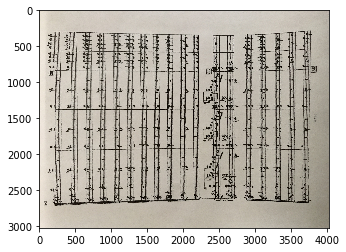

In [49]:
plt.imshow(img)

In [50]:
print(lookupTable)

[['0018b063c1801f7f', '433671_page_7.png'], ['03fead5b34e8ff7f', '49157_page_1.png'], ['02fc8978f7e8df7f', '22228_page_36.png'], ['02bc6971e64d807f', '515927_page_100.png'], ['00d428d2e142817f', '415756_page_27.png'], ['00fc7321c78cbb7f', '136304_page_325.png'], ['01ce0cf8b760c1bf', '34787_page_11.png'], ['0036cd3af4e9c47f', '114583_page_42.png'], ['036e9c9130e1df7f', '88639_page_6.png']]


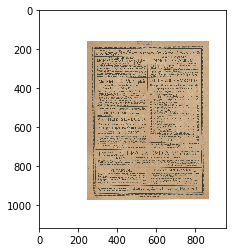

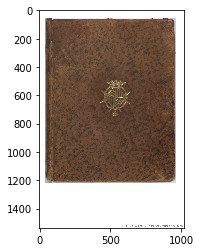

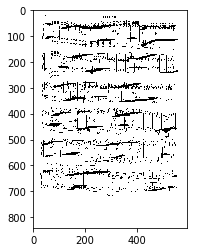

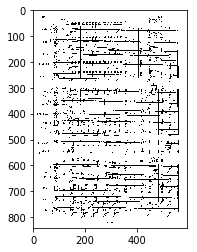

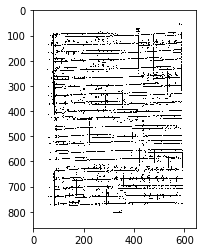

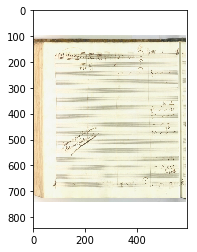

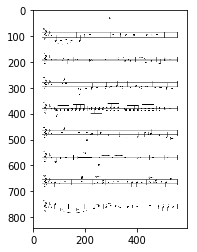

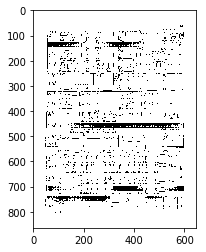

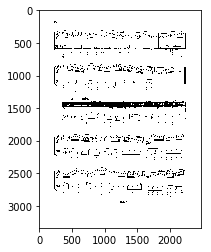

In [52]:
for i in range(len(lookupTable)):
    name = lookupTable[i][1]
    path = os.path.join(DB_PATH, name)
    img = Image.open(path)
    plt.imshow(img)
    plt.show()

The true image that it matches with is 105370_page_93, which did not show up here. :(